# Clasificación de datos estructurados por medio de una red neuronal profunda  

 

## Selección de la muestra  


> En formato de datos estructurados (.csv) 

>  Pueden ser de algún tema de investigación propio o puede ser tomado de algún repositorio de datos (por ejemplo, Kaggle).  

>  Debe contener una cantidad mínima de datos (>500 entradas)  

>  Debe contener una cantidad mínima de variables (>5 )  

>  El problema a resolver tiene que ser de clasificación (2 o más categorías) 

## Preprocesamiento de datos  

>   Eliminar columnas que no sean relevantes para el entrenamiento (columnas con un porcentaje de datos nulos > 30%, columnas que no son de utilidad para la red neuronal)  

>   En caso de que sea necesario a convertir a formato numérico hacer el respectivo mapeo, por ejemplo, en formato de fechas, o columnas que contengan caracteres y sea necesario convertirlo a clasificación (ejemplo “YES” ->1  “NO”-> 0)  

>  Ya que los datos están listos para la red neuronal separar la muestra en un porcentaje para entrenamiento (75%) y validación (25%) 

>  Para un mejor desempeño de la red neuronal normalizar los valores de las columnas para un valor entre 0 y 1  

## Definición de la red neuronal e hiperparametros  

> Definir la configuración inicial de la red neuronal (como recomendación empezar con una configuración básica e ir cambiando dependiendo del desempeño)  

> Seleccionar claramente los hiperparametros (factor de aprendizaje, funciones de activación, función de error, etc....) 

## Entrenamiento de la red neuronal  

> Realizar el entrenamiento de la red neuronal con keras 

> Dependiendo de los resultados ajustar los hiperparametros para optimizar la red neuronal 

> En caso de observar co-adaptacion de la red neuronal (overfitting) realizar un proceso de dropout   

> Guardar el modelo (formato .h5) 

## Análisis de resultados y presentacion 

>  Presentar los graficos finales de aprendizaje (error vs iteraciones,  accuracy vs iteraciones)  

   

## Conclusiones  

> Interpretar los resultados de la red neuronal    

 

> Discutir cuales serian las limitaciones de la red neuronal y de los resultados obtenidos.

 

 

 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.backend import clear_session
#from tensorflow.keras.callbacks import ReduceLROnPlateau

# **Análisis de datos para clasificación de personas femeninas, mayores a 21 años con Dx de Diabetes**


## Análisis Exploratorio de Datos (EDA)


Siempre es necesario importar los datos y realizar un "Análisis Exploratorio de Datos", ésto es con la finalidad de conocer la información con la que se va a trabajar, la manera en que se relacionan las variables, anomalías en el dataset, entre otras cosas.

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Buscamos valores nulos.

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Formato de datos en el dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Verificamos la forma de nuestra base de datos.

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Parece extraño el número de embarazos con 17, sin embargo es posible, según la presente base de datos.

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Realizamos una matriz de correlación entre los datos.

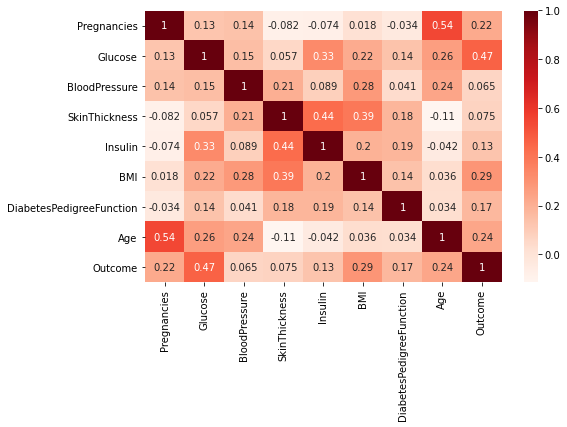

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='Reds',annot=True)

Para el presente ejercicio, y para no reducir más nuestro dataset, continuaremos con la misma información.

La relación entre las variables no está muy clara y parecen ser independientes unas de otras.

A continuación presentamos las variables y su frecuencia.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef5b929a10>,
      dtype=object)

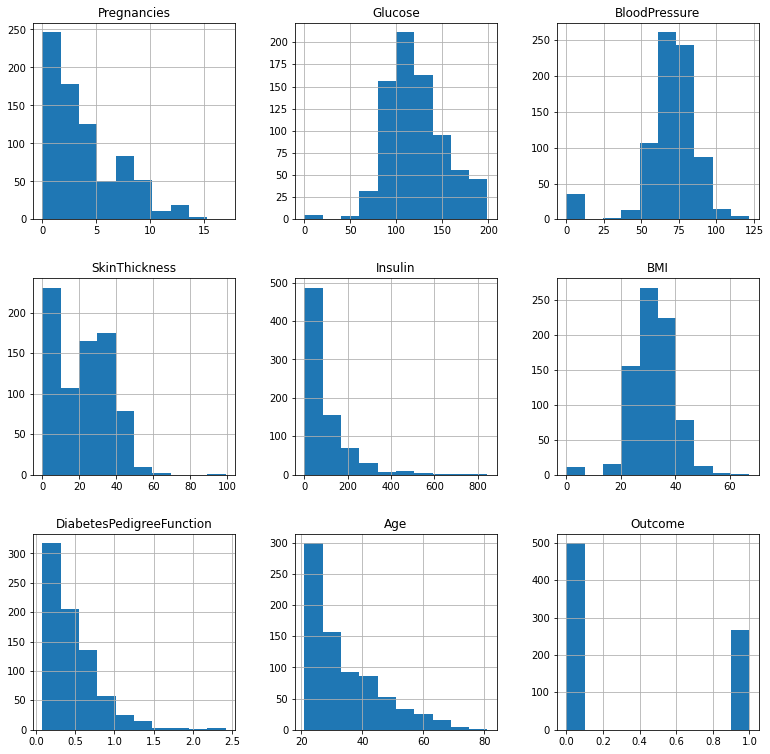

In [ ]:
df.hist(figsize = (13,13))

## Procesamiento de datos

Vamos a preparar nuestros datos, para separar la información en 2 datasets:


> Variables
  * Columnas de nuestros datos.

> Categoría
* Para el presente set de datos es 0 para pacientes sin diabetes; 1 para pacientes con diabetes diagnosticada.





In [ ]:
X_df = df
X_df = X_df.drop(['Outcome'], axis=1)
print(X_df)
y_df = df['Outcome']
print(y_df)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(X_df.shape)
print(y_df.shape)

(768, 8)
(768,)


Nuestro siguiente paso es establecer nuestros 2 grupos de datos:
> **Train**
>> Set de entrenamiento con las variables de entrada y la categoría.

>> *x_tr* y *y_tr*

> **Test**
>> Set de prueba con las variables de entrada y la categoría.

>> *x_ts* y *y_ts*

In [ ]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.25, random_state = 10)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [576,1])
y_ts = np.reshape(y_ts, [192,1])

print(x_ts.shape, 'x_ts')
print(x_tr.shape, 'x_tr')
print(y_ts.shape, 'y_ts')
print(y_tr.shape, 'y_tr')

(192, 8) x_ts
(576, 8) x_tr
(192, 1) y_ts
(576, 1) y_tr


In [ ]:
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (576, 8)
Testing Data : (192, 8)


## Normalización de valores

Normalizaremos los valores de nuestro dataset, para evitar tener rangos de valores muy grandes, y poder trabajar en nuestro modelo. 

In [ ]:
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (576, 8)
Testing Data : (192, 8)


## Red Neuronal e Hyperparámetros

A continuación se muestran algunos de los modelos realizados con distintos parámetros.


No todos los modelos realizados son presentados en la presente libreta.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Evaluating on training set...
loss=0.4476, accuracy: 78.2986%
Evaluating on testing set...
loss=0.5624, accuracy: 71.8750%


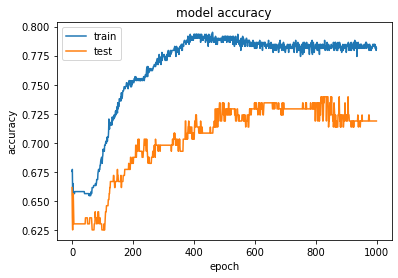

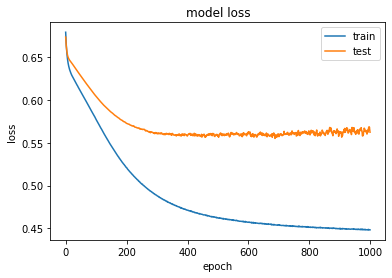

Maximum Loss : 0.6795

Minimum Loss : 0.4481

Loss difference : 0.2314


In [ ]:
# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.01 # The learning rate


# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layer
    model.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    #model.add(tf.keras.layers.Dense(20, input_dim=8,activation='sigmoid'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()


results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 0
)


print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
Evaluating on training set...
loss=0.4124, accuracy: 80.0347%
Evaluating on testing set...
loss=0.5579, accuracy: 72.3958%


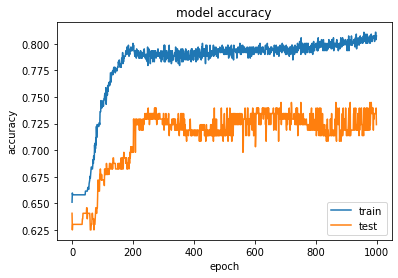

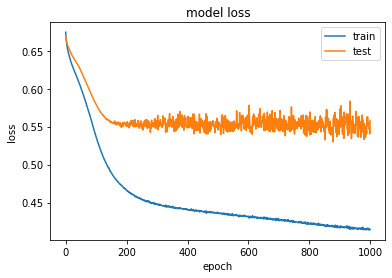

Maximum Loss : 0.6743

Minimum Loss : 0.4139

Loss difference : 0.2605


In [ ]:
# Hyperparameters
training_epochs1 = 1000 # Total number of training epochs
learning_rate1 = 0.01 # The learning rate
#momentum = 0.9

# create a model
def create_model1():
    model1 = tf.keras.Sequential()
    # Hidden layer
    model1.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    model1.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Output layer
    model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model1.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model1

model1 = create_model1()
model1.summary()


results1 = model1.fit(
    x_tr, y_tr,
    epochs= training_epochs1,
    validation_data = (x_ts, y_ts),
    verbose = 0
)


print("Evaluating on training set...")
(loss, accuracy) = model1.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model1.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results1.history['accuracy'])
plt.plot(results1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results1.history['loss'])
plt.plot(results1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss1 = np.max(results1.history['loss'])
min_loss1 = np.min(results1.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss1))
print("")
print("Minimum Loss : {:.4f}".format(min_loss1))
print("")
print("Loss difference : {:.4f}".format((max_loss1 - min_loss1)))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                270       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 12)                372       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 13        
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________
Evaluating on training set...
loss=0.1151, accuracy: 86.2847%
Evaluating on testing set...
loss=0.2031, accuracy: 70.8333%

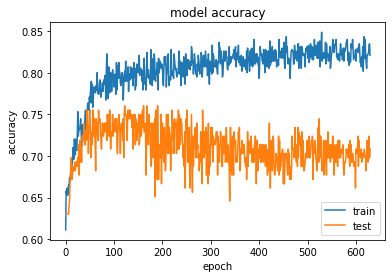

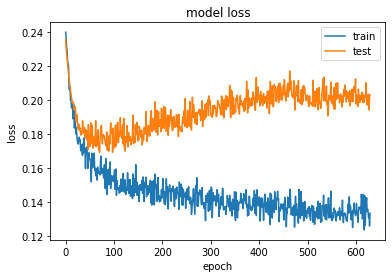

Maximum Loss : 0.2400

Minimum Loss : 0.1237

Loss difference : 0.1163


In [ ]:
# Hyperparameters
training_epochs2 = 1000 # Total number of training epochs
learning_rate2 = 0.01 # The learning rate
momentum = 0.9

# create a model
def create_model2():
    model2 = tf.keras.Sequential()
    # Hidden layer 1
    model2.add(tf.keras.layers.Dense(30, input_dim=8,activation='relu'))
    model2.add(Dropout(0.5))
    # Hidden layer 2
    model2.add(tf.keras.layers.Dense(12, input_dim=30,activation='relu'))
    model2.add(Dropout(0.5))
    # Output layer
    model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model2.compile(loss='mse', 
                  optimizer='adam', #tf.keras.optimizers.SGD(learning_rate2, momentum),
                  metrics=['accuracy'])
    return model2

model2 = create_model2()
model2.summary()


my_callbacks = [
    EarlyStopping(monitor='accuracy',patience=100),

]

results2 = model2.fit(
    x_tr, y_tr,
    epochs= training_epochs2,
    batch_size=5,
    validation_data = (x_ts, y_ts),
    callbacks=my_callbacks,
    verbose = 0
)



print("Evaluating on training set...")
(loss, accuracy) = model2.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model2.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss2 = np.max(results2.history['loss'])
min_loss2 = np.min(results2.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss2))
print("")
print("Minimum Loss : {:.4f}".format(min_loss2))
print("")
print("Loss difference : {:.4f}".format((max_loss2 - min_loss2)))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 2         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________
Evaluating on training set...
loss=0.4518, accuracy: 78.4722%
Evaluating on testing set...
loss=0.5701, accuracy: 70.8333%


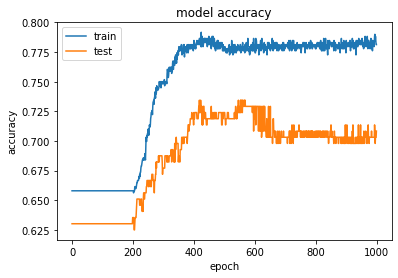

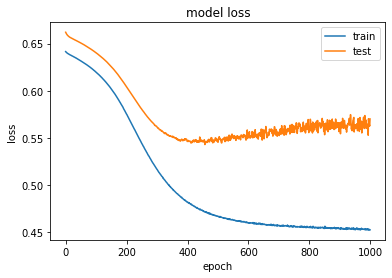

Maximum Loss : 0.6414

Minimum Loss : 0.4525

Loss difference : 0.1890


In [ ]:
# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.02 # The learning rate


# create a model
def create_model3():
    model3 = tf.keras.Sequential()
    # Hidden layer
    model3.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    model3.add(tf.keras.layers.Dense(1, input_dim=8,activation='sigmoid'))
    # Output layer
    model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model3.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model3

model3 = create_model3()
model3.summary()


results3 = model3.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 0
)


print("Evaluating on training set...")
(loss, accuracy) = model3.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model3.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss3 = np.max(results3.history['loss'])
min_loss3 = np.min(results3.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss3))
print("")
print("Minimum Loss : {:.4f}".format(min_loss3))
print("")
print("Loss difference : {:.4f}".format((max_loss3 - min_loss3)))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 21        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 2         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________
Evaluating on training set...
loss=0.4472, accuracy: 78.8194%
Evaluating on testing set...
loss=0.5540, accuracy: 70.8333%


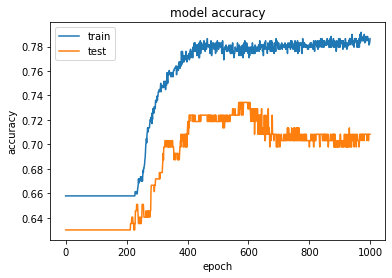

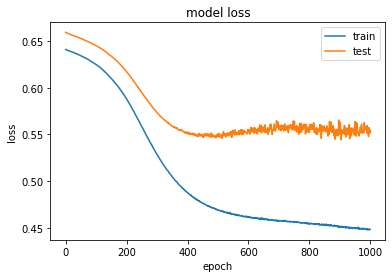

Maximum Loss : 0.6409

Minimum Loss : 0.4480

Loss difference : 0.1929


In [ ]:
# **** early stop
# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.02 # The learning rate


# create a model
def create_model4():
    model4 = tf.keras.Sequential()
    # Hidden layer
    model4.add(tf.keras.layers.Dense(20, input_dim=8,activation='relu'))
    # Hidden layer 2
    model4.add(tf.keras.layers.Dense(1, input_dim=8,activation='sigmoid'))
    # Output layer
    model4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model4.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model4

model4 = create_model4()
model4.summary()


results4 = model4.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 0
)


print("Evaluating on training set...")
(loss, accuracy) = model4.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model4.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results4.history['accuracy'])
plt.plot(results4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results4.history['loss'])
plt.plot(results4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss4 = np.max(results4.history['loss'])
min_loss4 = np.min(results4.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss4))
print("")
print("Minimum Loss : {:.4f}".format(min_loss4))
print("")
print("Loss difference : {:.4f}".format((max_loss4 - min_loss4)))

Guardamos los modelos de nuestro ejercicio en formato h5

In [ ]:
model.save('diabetes.h5', save_format= 'h5')
model1.save('diabetes1.h5', save_format= 'h5')
model2.save('diabetes2.h5', save_format= 'h5')
model3.save('diabetes3.h5', save_format= 'h5')
model4.save('diabetes4.h5', save_format= 'h5')

In [ ]:
pip install optuna

     |████████████████████████████████| 296kB 9.2MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 163kB 11.8MB/s 
     |████████████████████████████████| 143kB 13.0MB/s 
     |████████████████████████████████| 112kB 15.2MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=5e6503b150a2e0240056162e971856f1dbbdaf081e3b52716b398d5c0c915ed6
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
pip install optkeras

In [ ]:
import optuna

In [ ]:
from optkeras.optkeras import OptKeras

/usr/local/lib/python3.7/dist-packages/optuna/structs.py:18: FutureWarning:

`structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.



In [ ]:
study_name = 'diabetes' + '_Simple'

""" Step 1. Initiate OptKeras class
You can specify arguments for Optuna's create_study method and other arguments 
for OptKeras such as enable_pruning. 
"""

ok = OptKeras(study_name=study_name)


""" Step 2. Define objective function for Optuna """

def objective(trial):
    
    """ Clear the backend (TensorFlow). See:
    https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
    """
    K.clear_session() 
 
    """ Step 2.1. Define parameters to try using methods of optuna.trial such as 
    suggest_categorical. 
    (filters, kernel_size, strides, and activation for convolution).
    """   

    modelX = Sequential()
    modelX.add(tf.keras.layers.Model(
        filters = trial.suggest_categorical('units', [20, 50]), 
        dropout = trial.suggest_float('dropout', 0.2 , 0.5), 
        activation = trial.suggest_categorical('activation', ['relu', 'sigmoid']), 
        input_shape = (X_train.shape[1], X_train.shape[2] ))
    #modelX.add(Flatten())
    #modelX.add(Dense(num_classes, activation='softmax'))
    modelX.compile(optimizer = Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    #""" Step 2.2. Specify callbacks(trial) and keras_verbose in fit 
    #(or fit_generator) method of Keras model
    #"""
    
    modelX.fit(x_train, y_train, 
              validation_data = (x_test, y_test), shuffle = True,
              batch_size = batch_size, epochs = epochs,
              callbacks = ok.callbacks(trial), 
              verbose = ok.keras_verbose )  
    
    """ Step 2.3. Return trial_best_value (or latest_value) """
    return ok.trial_best_value

""" Step 3. Run optimize. 
Set n_trials and/or timeout (in sec) for optimization by Optuna
"""
ok.optimize(objective, timeout = 60) # 1 minute for demo

SyntaxError: ignored

## Conclusiones



1.   El proceso de aprendizaje no fue muy bueno, ya que su accuracy se mantuvo alrededor del 70%, tanto para entrenar como para probar.
2.   Se probaron distintas configuraciones de la red neuronal y no fue posible tener mejores valores de entrenamiento ni de prueba, una razón posible, es que nuestro dataset es muy pequeño.
3. Al agregarle más capas ocultas a nuestra red neuronal, el rendimiento del proceso de aprendizaje y de categorización, se volvía más inestable.
4. El "model3" de nuestras redes neuronales implementadas, tuvo una curva de aprendizaje mejor, ya que después de mantenerse algunas iteracciones con el mismo valor de accuracy, logró aumentar de una manera menos accidentada que las demás.
5. El "model2" de nuestras redes, logró mejores valores de "accuracy" tanto en el entrenamiento, como en las pruebas; pero con la gráfica nos indica que el proceso de aprendizaje no se llevó a cabo de manera apropiada. 

